In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#uploading the csv file to google colab
from google.colab import files
uploaded = files.upload()

Saving Time_series_analysis_and_forecast_DATASET.csv to Time_series_analysis_and_forecast_DATASET.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Time_series_analysis_and_forecast_DATASET.csv']))
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
#checking for null values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [6]:
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [7]:
from fbprophet import Prophet

In [8]:
 #convert FullDate to a time series object and use FullDate as index
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)
df.set_index('FullDate', inplace = True)
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [9]:
#Resample to daily data points
df_daily = df.resample('D').sum()
df_daily


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [10]:

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30
No. of lags used: 67
No. of observations used : 91948
Critical Values:
   1%: -3.430421121531399
   5%: -2.861571434572286
   10%: -2.566786731528145


In [11]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09
No. of lags used: 48
No. of observations used : 91967
Critical Values:
   1%: -3.430421106837576
   5%: -2.86157142807793
   10%: -2.566786728071412


In [12]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used : 91962
Critical Values:
   1%: -3.430421110703783
   5%: -2.8615714297867108
   10%: -2.56678672898094


In [13]:
#making a copy of the dataset for the univariate Forecast Model
import copy
df_daily_copy = df_daily.reset_index()
df_daily_copy.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'ElecPrice')

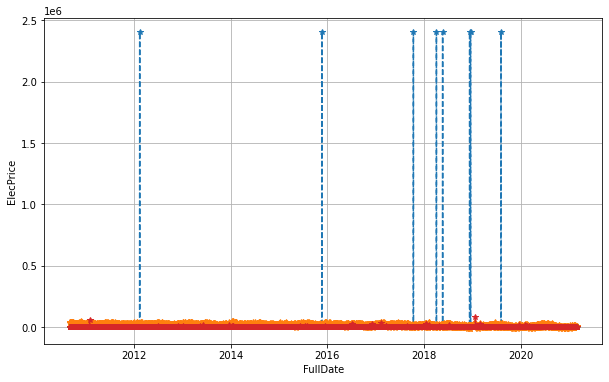

In [14]:
#quiz question 11
plt.figure(figsize=( 10 , 6 ))
plt.plot( df_daily, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'FullDate' )
plt.ylabel( 'ElecPrice' )

In [15]:
#Create a subset of FullDate and ElecPrice
df_daily_copy = df_daily_copy[['FullDate','ElecPrice']]
df_daily_copy.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
df_daily_copy = df_daily_copy.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_daily_copy.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
X = df_daily_copy
y  = df_daily_copy.y

In [18]:
x = int(len(X))
X_train, X_test = X[:2757], X[2757:]
y_train, y_test = y[:2757], y[2757:]

In [19]:
model = Prophet()
model.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = model.make_future_dataframe(periods= 100 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1461.242685,3532.710446,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1326.274083,3408.001657,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1287.957338,3019.122940,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1840.754804,2730.499069,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-2055.278155,2826.429235,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
2852,2018-06-23,2649.488213,402.983576,5005.188700,2769.338458,2738.668430,2802.499952
2853,2018-06-24,2625.429959,273.650098,5135.963047,2770.155027,2739.005689,2803.716053
2854,2018-06-25,3159.873362,721.142176,5391.831899,2770.971596,2739.260760,2804.961195
2855,2018-06-26,3092.223681,626.599215,5415.537331,2771.788165,2739.515830,2806.206338


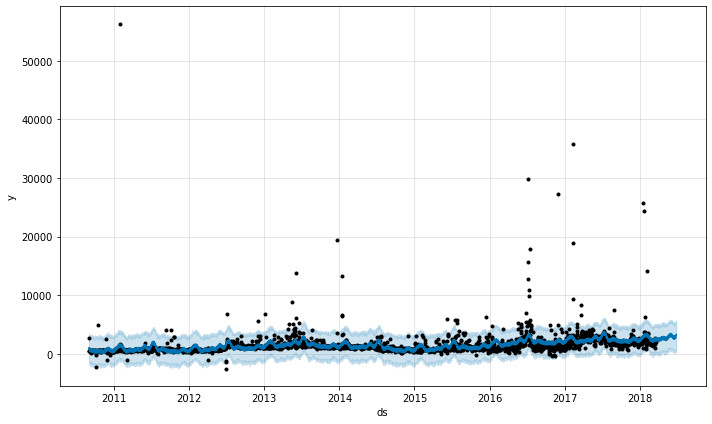

In [21]:
model.plot(forecast)
plt.show()

In [22]:
#Calculate MAPE
import numpy as np
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [24]:
actual = y_train
pred = forecast['yhat'][:2757]
mape(actual, pred)

59.56227791978223

In [25]:
#multivariate Forecast Model
df_daily = df_daily.reset_index()
df_daily = df_daily[['FullDate','ElecPrice']]
df_daily = df_daily.rename(columns={"FullDate": "dt", "ElecPrice": "y"})
X1 = df_daily
y1 = df_daily.y
x1 = int(len(X1))
X1_train, X1_test = X1[:2757], X1[2757:]
y1_train, y1_test = y1[:2757], y1[2757:]


In [26]:
model_new = Prophet()
add1 = model_new.add_regressor('SysLoad')
add2 = model_new.add_regressor('Tmax’')
add3 = model_new.add_regressor('GasPrice')
